In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('C:/Users/ADITHYA/Downloads/my projects/station_hour.csv')
df

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.10,11.85,126.40,0.10,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.10,13.17,117.12,0.10,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.10,12.08,98.98,0.20,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.10,10.47,112.20,0.20,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.10,9.12,106.35,0.20,5.75,0.08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589078,WB013,2020-06-30 20:00:00,15.55,47.80,7.27,35.08,42.38,31.25,0.80,9.40,17.24,2.56,11.57,NaN,59.0,Satisfactory
2589079,WB013,2020-06-30 21:00:00,15.23,42.30,6.10,26.78,32.85,30.66,0.56,4.91,17.46,3.49,12.29,NaN,59.0,Satisfactory
2589080,WB013,2020-06-30 22:00:00,11.40,40.95,6.58,19.53,26.12,30.73,0.61,3.81,17.24,1.83,8.88,NaN,59.0,Satisfactory
2589081,WB013,2020-06-30 23:00:00,9.25,34.33,9.17,21.85,31.00,29.61,0.65,3.44,12.74,1.40,8.43,NaN,59.0,Satisfactory


In [4]:
df.head()


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [5]:
df.tail()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2589078,WB013,2020-06-30 20:00:00,15.55,47.80,7.27,35.08,42.38,31.25,0.80,9.40,17.24,2.56,11.57,NaN,59.0,Satisfactory
2589079,WB013,2020-06-30 21:00:00,15.23,42.30,6.10,26.78,32.85,30.66,0.56,4.91,17.46,3.49,12.29,NaN,59.0,Satisfactory
2589080,WB013,2020-06-30 22:00:00,11.40,40.95,6.58,19.53,26.12,30.73,0.61,3.81,17.24,1.83,8.88,NaN,59.0,Satisfactory
2589081,WB013,2020-06-30 23:00:00,9.25,34.33,9.17,21.85,31.00,29.61,0.65,3.44,12.74,1.40,8.43,NaN,59.0,Satisfactory
2589082,WB013,2020-07-01 00:00:00,10.50,36.50,7.78,22.50,30.25,27.23,0.58,2.80,13.10,1.31,7.39,NaN,59.0,Satisfactory


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


In [7]:
df.shape

(2589083, 16)

In [8]:
df.columns

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [9]:
df.dtypes

StationId      object
Datetime       object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [10]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1.941394e+06,1.469831e+06,2.035372e+06,2.060110e+06,2.098275e+06,1.352465e+06,2.089781e+06,1.846346e+06,1.863110e+06,1.727504e+06,1.546717e+06,513979.000000,2.018893e+06
mean,8.086481e+01,1.584839e+02,2.278825e+01,3.523689e+01,4.055115e+01,2.870856e+01,1.502366e+00,1.211602e+01,3.806408e+01,3.305493e+00,1.490266e+01,2.448881,1.801730e+02
std,8.947618e+01,1.397883e+02,4.846146e+01,3.497508e+01,5.590894e+01,2.753244e+01,6.292445e+00,1.467385e+01,4.710653e+01,1.214053e+01,3.329729e+01,8.973470,1.404095e+02
min,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000,5.000000e+00
25%,2.816000e+01,6.400000e+01,3.050000e+00,1.310000e+01,1.135000e+01,1.123000e+01,4.100000e-01,4.250000e+00,1.102000e+01,8.000000e-02,3.400000e-01,0.000000,8.400000e+01
50%,5.259000e+01,1.162500e+02,7.150000e+00,2.479000e+01,2.286000e+01,2.235000e+01,8.000000e-01,8.250000e+00,2.475000e+01,9.600000e-01,3.400000e+00,0.200000,1.310000e+02
75%,9.774000e+01,2.040000e+02,1.858000e+01,4.548000e+01,4.570000e+01,3.778000e+01,1.380000e+00,1.453000e+01,4.953000e+01,3.230000e+00,1.510000e+01,1.830000,2.590000e+02
max,1.000000e+03,1.000000e+03,5.000000e+02,4.999900e+02,5.000000e+02,4.999700e+02,4.985700e+02,1.999600e+02,9.970000e+02,4.980700e+02,4.999900e+02,499.990000,3.133000e+03


In [11]:
df.isnull().sum()

StationId           0
Datetime            0
PM2.5          647689
PM10          1119252
NO             553711
NO2            528973
NOx            490808
NH3           1236618
CO             499302
SO2            742737
O3             725973
Benzene        861579
Toluene       1042366
Xylene        2075104
AQI            570190
AQI_Bucket     570190
dtype: int64

## DATA CLEANING

In [12]:
num_cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','AQI']

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [13]:
df = df.drop(columns=['Datetime','StationId','Xylene'],errors='ignore')

In [14]:
df = df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','AQI','AQI_Bucket']]


# ENCODE

In [15]:
le = LabelEncoder()
df['AQI_Bucket'] = le.fit_transform(df['AQI_Bucket'].astype(str))


In [16]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,60.50,98.00,2.35,30.80,18.25,8.50,0.10,11.85,126.40,0.10,6.10,131.0,6
1,65.50,111.25,2.70,24.20,15.07,9.77,0.10,13.17,117.12,0.10,6.25,131.0,6
2,80.00,132.00,2.10,25.18,15.15,12.02,0.10,12.08,98.98,0.20,5.98,131.0,6
3,81.50,133.25,1.95,16.25,10.23,11.58,0.10,10.47,112.20,0.20,6.72,131.0,6
4,75.25,116.00,1.43,17.48,10.43,12.03,0.10,9.12,106.35,0.20,5.75,131.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589078,15.55,47.80,7.27,35.08,42.38,31.25,0.80,9.40,17.24,2.56,11.57,59.0,3
2589079,15.23,42.30,6.10,26.78,32.85,30.66,0.56,4.91,17.46,3.49,12.29,59.0,3
2589080,11.40,40.95,6.58,19.53,26.12,30.73,0.61,3.81,17.24,1.83,8.88,59.0,3
2589081,9.25,34.33,9.17,21.85,31.00,29.61,0.65,3.44,12.74,1.40,8.43,59.0,3


In [17]:
df.isnull().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

# EDA

<Axes: xlabel='PM2.5', ylabel='AQI'>

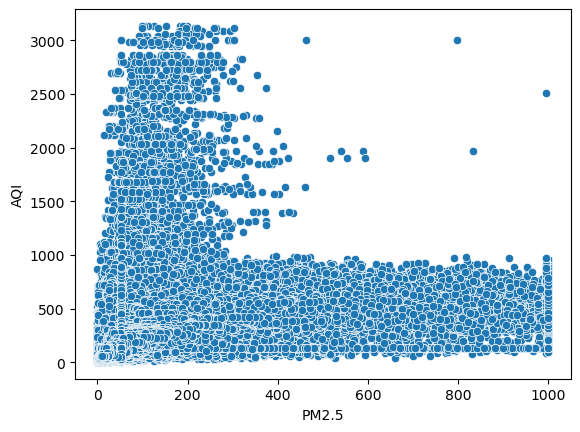

In [18]:
sns.scatterplot(x=df['PM2.5'], y=df['AQI'])

<Axes: >

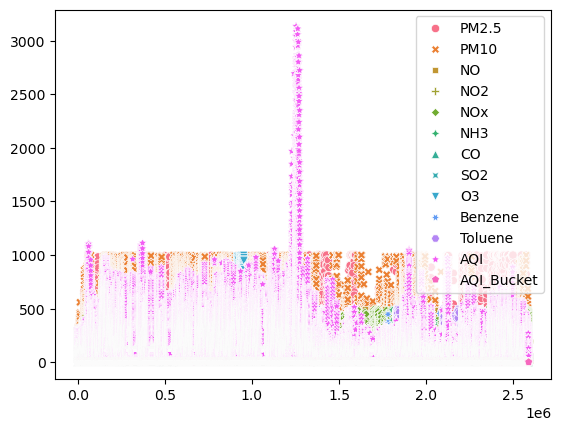

In [19]:
sns.scatterplot(df)

<Axes: xlabel='AQI_Bucket', ylabel='count'>

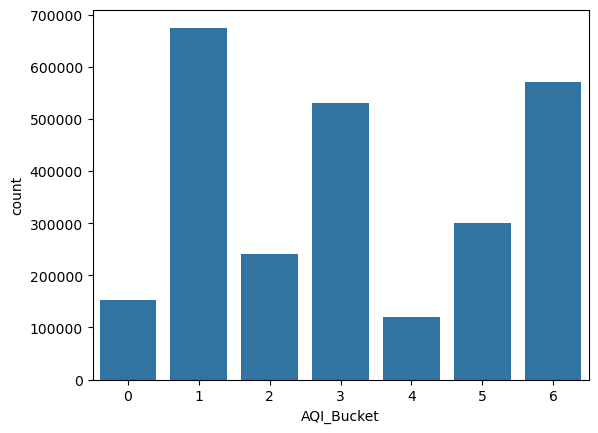

In [20]:
sns.countplot(x=df['AQI_Bucket'])


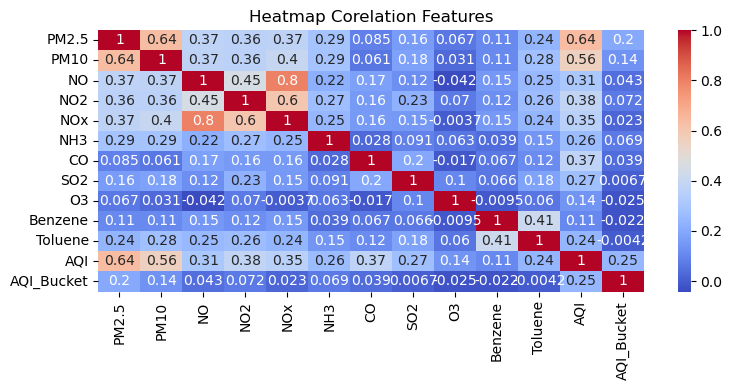

In [21]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Heatmap Corelation Features')
plt.tight_layout()
plt.show()

## DATA SPLITTING

In [22]:
X = df.drop(columns=['AQI_Bucket','AQI'])  
Y = df['AQI_Bucket']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit + transform on train
X_test_scaled = scaler.transform(X_test)        # only transform on test

## MODEL TRAINING

## LOGISTIC REGRESSION

In [24]:
model1 = LogisticRegression()
model1.fit(X_train_scaled,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
Y_pred1=model1.predict(X_test_scaled)
Y_pred1

array([3, 1, 5, ..., 3, 4, 6], shape=(517817,))

In [26]:
acc = accuracy_score(Y_test, Y_pred1)
prec = precision_score(Y_test, Y_pred1, average='weighted')
f1 = f1_score(Y_test, Y_pred1, average='weighted')
rec = recall_score(Y_test, Y_pred1, average='weighted')
print("Accuracy:", acc)
print("Precision:", prec)
print("F1 Score:", f1)
print("Sensitivity_Recall:", rec)

Accuracy: 0.5460094975638111
Precision: 0.5329649200105336
F1 Score: 0.5201649939733543
Sensitivity_Recall: 0.5460094975638111


In [27]:
print(confusion_matrix(Y_test, Y_pred1))
print(classification_report(Y_test, Y_pred1))

[[11868   255     0 16990     1     7  1630]
 [  983 69155  1347 26318   106  5920 30449]
 [   65 22063  2191  1932   319 11791  9544]
 [ 6719 17112    16 62800     5   263 19244]
 [   38  2004   944   357  8853 10916  1007]
 [   40 11375  1376   891  3029 36871  6961]
 [  575 14956   213  4316   570  2437 90995]]
              precision    recall  f1-score   support

           0       0.58      0.39      0.47     30751
           1       0.51      0.52      0.51    134278
           2       0.36      0.05      0.08     47905
           3       0.55      0.59      0.57    106159
           4       0.69      0.37      0.48     24119
           5       0.54      0.61      0.57     60543
           6       0.57      0.80      0.66    114062

    accuracy                           0.55    517817
   macro avg       0.54      0.47      0.48    517817
weighted avg       0.53      0.55      0.52    517817



## DECISION TREE CLASSIFIER

In [28]:
model2 = DecisionTreeClassifier(max_depth=10, random_state=42)
model2.fit(X_train_scaled, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
Y_pred2 = model2.predict(X_test_scaled)
Y_pred2

array([3, 1, 4, ..., 3, 4, 6], shape=(517817,))

In [30]:
acc2 = accuracy_score(Y_test, Y_pred2)
prec2 = precision_score(Y_test, Y_pred2, average='weighted') 
f1_2 = f1_score(Y_test, Y_pred2, average='weighted')
rec2 = recall_score(Y_test, Y_pred2, average='weighted')
print("Accuracy:", acc2)
print("Precision:", prec2)
print("F1 Score:", f1_2)
print("Sensitivity / Recall:", rec2)

Accuracy: 0.6560966519059822
Precision: 0.6507429307616448
F1 Score: 0.6486753833877326
Sensitivity / Recall: 0.6560966519059822


In [31]:
print(confusion_matrix(Y_test, Y_pred2))
print(classification_report(Y_test, Y_pred2))

[[ 18904    310      6  10540      4      8    979]
 [  1834  92554   5729  25199    402   5363   3197]
 [   156  22559  10043   2314    832  10986   1015]
 [ 10313  21957    418  70131     24    344   2972]
 [   165   1324   1292    354  11478   8994    512]
 [   149  10944   6400   1143   4148  36504   1255]
 [  1448   5034    825   4023    542   2066 100124]]
              precision    recall  f1-score   support

           0       0.57      0.61      0.59     30751
           1       0.60      0.69      0.64    134278
           2       0.41      0.21      0.28     47905
           3       0.62      0.66      0.64    106159
           4       0.66      0.48      0.55     24119
           5       0.57      0.60      0.58     60543
           6       0.91      0.88      0.89    114062

    accuracy                           0.66    517817
   macro avg       0.62      0.59      0.60    517817
weighted avg       0.65      0.66      0.65    517817



## RANDOM FOREST

In [32]:
model3 =  RandomForestClassifier(n_estimators=50, max_depth=15)
model3.fit(X_train,Y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
Y_pred3 = model3.predict(X_test)
Y_pred3

array([3, 1, 4, ..., 3, 4, 6], shape=(517817,))

In [34]:
acc3 = accuracy_score(Y_test, Y_pred3) 
prec3 = precision_score(Y_test, Y_pred3, average='weighted') 
f1_3 = f1_score(Y_test, Y_pred3, average='weighted')
rec3 = recall_score(Y_test, Y_pred3, average='weighted')
print("Accuracy:", acc3)
print("Precision:", prec3)
print("F1 Score:", f1_3)
print("Sensitivity / Recall:", rec3)

Accuracy: 0.6834074586195509
Precision: 0.6824660691821949
F1 Score: 0.6737837029975605
Sensitivity / Recall: 0.6834074586195509


In [35]:
print(confusion_matrix(Y_test, Y_pred3))
print(classification_report(Y_test, Y_pred3))

[[ 17021    201      2  12519      0     10    998]
 [   961  96082   3892  24659    156   5340   3188]
 [    84  22286  10333   2198    462  11511   1031]
 [  5833  19578    134  77252      4    389   2969]
 [   106   1241    912    415  12440   8482    523]
 [    95  10858   3943   1114   3349  39907   1277]
 [   928   5006    476   4353    448   2006 100845]]
              precision    recall  f1-score   support

           0       0.68      0.55      0.61     30751
           1       0.62      0.72      0.66    134278
           2       0.52      0.22      0.31     47905
           3       0.63      0.73      0.68    106159
           4       0.74      0.52      0.61     24119
           5       0.59      0.66      0.62     60543
           6       0.91      0.88      0.90    114062

    accuracy                           0.68    517817
   macro avg       0.67      0.61      0.63    517817
weighted avg       0.68      0.68      0.67    517817



## XGBClassifier

In [36]:
model4 = XGBClassifier()
model4.fit(X_train,Y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [37]:
Y_pred4 = model4.predict(X_test)
Y_pred4

array([3, 1, 5, ..., 3, 4, 6], shape=(517817,))

In [38]:
acc4 = accuracy_score(Y_test,Y_pred4)
prec4 = precision_score(Y_test,Y_pred4, average='weighted')
f1_4 = f1_score(Y_test,Y_pred4, average='weighted')
rec4 = recall_score(Y_test,Y_pred4, average='weighted')
print('Accuracy:',acc4)
print('Precison:',prec4)
print('F1 Score:',f1_4)
print('Senstivity/Recall:',rec4)

Accuracy: 0.678954147893947
Precison: 0.6739880131506677
F1 Score: 0.6714576433835081
Senstivity/Recall: 0.678954147893947


In [39]:
print(confusion_matrix(Y_test,Y_pred4))
print(classification_report(Y_test,Y_pred4))

[[ 18793    192      5  10712      5      8   1036]
 [  1205  93900   5631  24633    246   5076   3587]
 [   108  21054  11511   2273    677  11170   1112]
 [  7536  19549    320  75081     11    339   3323]
 [   137   1093   1105    395  12889   7936    564]
 [   136   9940   5301   1164   4189  38441   1372]
 [  1043   4804    661   4200    517   1878 100959]]
              precision    recall  f1-score   support

           0       0.65      0.61      0.63     30751
           1       0.62      0.70      0.66    134278
           2       0.47      0.24      0.32     47905
           3       0.63      0.71      0.67    106159
           4       0.70      0.53      0.60     24119
           5       0.59      0.63      0.61     60543
           6       0.90      0.89      0.89    114062

    accuracy                           0.68    517817
   macro avg       0.65      0.62      0.63    517817
weighted avg       0.67      0.68      0.67    517817



## CONCLUSION

## DEPLOYMENT

In [40]:
import streamlit as st
import pandas as pd
import joblib

joblib.dump(model4, 'xgb_aqi_model.pkl')   # ✅ this creates the file

st.title("🌬️ Air Quality AQI Prediction App")
st.write("Enter air quality measurements to predict AQI Category (AQI_Bucket).")

# Load trained XGBClassifier model
model = joblib.load('xgb_aqi_model.pkl')

# Features for input
feature_cols = ["PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]

# Create input fields
input_data = {}
for col in feature_cols:
    input_data[col] = st.number_input(col, value=0.0)

# Convert input to DataFrame
input_df = pd.DataFrame([input_data])

# Predict button
if st.button("Predict AQI Category"):
    prediction = model.predict(input_df)[0]
    st.write("✅ Predicted AQI Category:", prediction)


2026-01-15 13:08:02.820 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 13:08:03.723 
  command:

    streamlit run C:\Users\ADITHYA\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-01-15 13:08:03.724 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 13:08:03.724 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 13:08:03.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 13:08:03.726 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 13:08:03.727 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 13:08:03.854 Thread 

In [ ]:
  Local URL: http://localhost:8501
  Network URL: http://10.179.255.182:8501